# NEWS Article Classification

### Problem Statement

The primary objective of this project is to build a classification model that can automatically
categorize news articles into different predefined categories.

In [4]:
# Imporing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Loading the dataset and having a view at first few rows
df = pd.read_csv("data_news - data_news.csv")
df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [6]:
# Having a look at Total Number of Rows and columns
df.shape

(50000, 5)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [8]:
# Checking for null values in the dataset
df.isnull().sum()

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

We can see that there are significant null values in the column of Keywords in the dataset.So we try to fill those values with empty strings.

In [10]:
# filling null values with empty strings 
df['keywords'] = df['keywords'].fillna('')

In [11]:
# Checking whether null values removed or not in the dataset
df.isnull().sum()

category             0
headline             0
links                0
short_description    0
keywords             0
dtype: int64

From above we can conclude that we are sucessfull in replacing the null values. 

In [13]:
# Looing look at the columns available in the dataset.
df.columns

Index(['category', 'headline', 'links', 'short_description', 'keywords'], dtype='object')

In [14]:
# dropping unwanted columns like links
df = df.drop(['links'],axis = 1)
df.head()

,category,headline,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [15]:
# Creating a new column in dataset combing all the headline,description and keywords columns.
df['preprocessed_text'] = df['headline'] + ' ' + df['short_description'] + ' ' + df['keywords']
df.head()

,category,headline,short_description,keywords,preprocessed_text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...,running-lessons,143 Miles in 35 Days: Lessons Learned Resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,Talking to Yourself: Crazy or Crazy Helpful? T...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf...",meaningful-life,"Oh, What a Difference She Made If you want to ..."
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a...",green-superfoods,"Green Superfoods First, the bad news: Soda bre..."


In [16]:
# Checking for how unique number of categories are available.
df['category'].nunique()

10

In [17]:
df['category'].value_counts()

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64

Here we can see that the distribution of all 10 categories are equally distibuted with 5000 label for each catagory.We can assue that this is a balanced dataset.

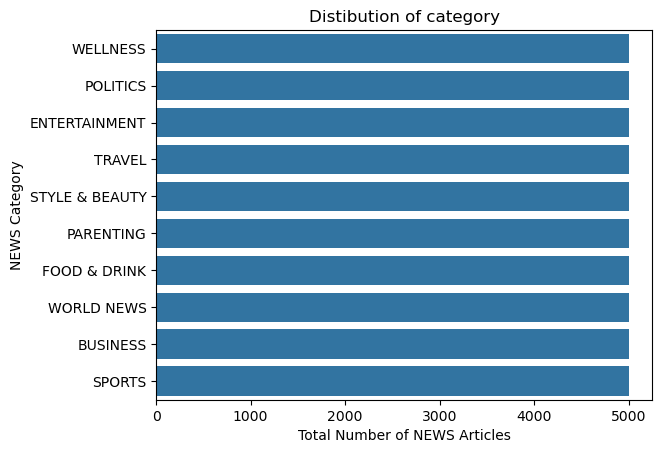

In [19]:
# Distibution of category
sns.countplot(y=df['category'])
plt.title("Distibution of category")
plt.xlabel("Total Number of NEWS Articles")
plt.ylabel("NEWS Category")
plt.show()

###  Performing data Cleaning and Text Preprocessing

In [21]:
# Importing necessary Libraries for Text preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


In [22]:
## Creation a function for Text Preprocessing

def preprocessing(text):
    text = text.lower() #converting to lower case
    text = re.sub(r'[^a-z\s]',"",text) #Removig the special characters
    tokens = word_tokenize(text) # tokenzing the words
    tokens = [word for word in tokens if word not in stop_words] #removing the stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens) # joining back tokens to tect by giving space betwen the tokens
    return text

In [23]:
# Adding a new column Cleaned text and apply the preprocessing function created before.
df['cleaned_text']=df['preprocessed_text'].apply(preprocessing)
df.head()

,category,headline,short_description,keywords,preprocessed_text,cleaned_text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...,running-lessons,143 Miles in 35 Days: Lessons Learned Resting ...,mile day lesson learned resting part training ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimers drug...
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf...",meaningful-life,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a...",green-superfoods,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...


## Feature Engineering

### Feature extraction using techniques like TF-IDF,Bag of Words

In [26]:
# Assigning the Features and Target variables for Training the model
x=df['cleaned_text']
y = df['category']

In [27]:
# importing Tfidf vectorizer for conversion of textual data to numerical format for model training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# Converting textual data to numerical format using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = vectorizer.fit_transform(x)

In [29]:
# Converting textual data to numerical format using Count Vectorizer(Bag OF Words)
c_vectorizer = CountVectorizer(max_features=5000)
x_train_bow = c_vectorizer.fit_transform(x)

#### Textual features

In [31]:
def extract_text_features(text):
    words = word_tokenize(text)  # Tokenize words
    sentences = sent_tokenize(text)  # Tokenize sentences
    
    word_count = len(words)  # Total words
    char_count = len(text)  # Total characters
    avg_word_length = char_count / word_count if word_count > 0 else 0  # Avg word length
    sentence_count = len(sentences)  # Total sentences
    
    return pd.Series([word_count, char_count, avg_word_length, sentence_count])

In [32]:
# Apply feature extraction to prerocessed text column which is combination of headline,description and keywords for better analysis.
df[["word_count", "char_count", "avg_word_length", "sentence_count"]] = df["preprocessed_text"].apply(extract_text_features)

In [33]:
df.head()

,category,headline,short_description,keywords,preprocessed_text,cleaned_text,word_count,char_count,avg_word_length,sentence_count
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...,running-lessons,143 Miles in 35 Days: Lessons Learned Resting ...,mile day lesson learned resting part training ...,69.0,334.0,4.840580,5.0
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...,53.0,287.0,5.415094,4.0
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimers drug...,41.0,241.0,5.878049,2.0
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf...",meaningful-life,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...,34.0,153.0,4.500000,3.0
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a...",green-superfoods,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...,34.0,159.0,4.676471,3.0


In [34]:
# Having a look at statical summary of dataset (preocessed text)
df.describe()

,word_count,char_count,avg_word_length,sentence_count
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,37.872760,220.413560,5.991834,2.358380
std,15.013213,74.457746,0.897779,1.063619
min,5.000000,35.000000,3.416667,1.000000
25%,28.000000,172.000000,5.361111,2.000000
50%,35.000000,210.000000,5.854956,2.000000
75%,45.000000,255.000000,6.481481,3.000000
max,265.000000,1444.000000,12.727273,14.000000


## Model Development and Training

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# splitting the testing and traingset for model training
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(x_train_tfidf,y,test_size = 0.2,random_state=42)

In [38]:
# splitting the testing and traingset for model training
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(x_train_bow,y,test_size = 0.2,random_state=42)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
# Model Development and Training using TF-IDF
# Creating the model
log_reg = LogisticRegression()
#training the model
log_reg.fit(x_train_tfidf,y_train_tfidf) 
#predicting the output for the unseen test data(x_train_tfidf)
log_reg_pred_tfidf = log_reg.predict(x_test_tfidf) #predicting the output for the unseen test data(x_train_tfidf)
print(f"The Accuracy Score of Logistic Legression moedel is :{accuracy_score(y_test_tfidf,log_reg_pred_tfidf)*100:.2f}")

The Accuracy Score of Logistic Legression moedel is :79.89


In [42]:
# Model Development and Training using Bag of Words

#training the model
log_reg.fit(x_train_bow,y_train_bow) 
#predicting the output for the unseen test data(x_train_tfidf)
log_reg_pred_bow = log_reg.predict(x_test_bow) 
print(f"The Accuracy Score of Logistic Legression moedel is :{accuracy_score(y_test_tfidf,log_reg_pred_bow)*100:.2f}")

The Accuracy Score of Logistic Legression moedel is :78.59


### Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [45]:
# Model Development and Training using TF-IDF
# Creating the model
nb = MultinomialNB()
#training the model
nb.fit(x_train_tfidf,y_train_tfidf)
#predicting the output for the unseen test data(x_train_tfidf)
nb_pred = nb.predict(x_test_tfidf)
print(f"The Accuracy Score of Multinomial moedel Naive Bayes is :{accuracy_score(y_test_tfidf,nb_pred)*100:.2f}")

The Accuracy Score of Multinomial moedel Naive Bayes is :78.11


In [46]:
# Model Development and Training using Bag of Words
#training the model
nb.fit(x_train_bow,y_train_bow)
#predicting the output for the unseen test data(x_train_bow)
nb_pred_bow = nb.predict(x_test_bow)
print(f"The Accuracy Score of Multinomial Naive Bayes moedel is :{accuracy_score(y_test_bow,nb_pred_bow)*100:.2f}")

The Accuracy Score of Multinomial Naive Bayes moedel is :78.22


#### Bernoli Naive Bayes

In [48]:
# Model Development and Training using TF-IDF
# Creating the model
bn = BernoulliNB()
#training the model
bn.fit(x_train_tfidf,y_train_tfidf)
#predicting the output for the unseen test data(x_train_tfidf)
bn_pred_tfidf = bn.predict(x_test_tfidf)
print(f"The Accuracy Score of Bernoli Naive Bayes moedel is :{accuracy_score(y_test_tfidf,bn_pred_tfidf)*100:.2f}")

The Accuracy Score of Bernoli Naive Bayes moedel is :78.14


In [49]:
# Model Development and Training using Bag of Words
#training the model
bn.fit(x_train_bow,y_train_bow)
#predicting the output for the unseen test data(x_train_bow)
bn_pred_bow = bn.predict(x_test_bow)
print(f"The Accuracy Score of Bernoli Naive Bayes moedel is :{accuracy_score(y_test_bow,bn_pred_bow)*100:.2f}")

The Accuracy Score of Bernoli Naive Bayes moedel is :78.14


### Support Vector Machine

In [51]:
from sklearn.svm import LinearSVC

In [52]:
# Model Development and Training using TF-IDF
# Creating the model
svc = LinearSVC(max_iter=5000)
#training the model
svc.fit(x_train_tfidf,y_train_tfidf)
#predicting the output for the unseen test data(x_train_tfidf)
svc_pred_tfidf = svc.predict(x_test_tfidf)
print(f"The Accuracy Score of Support Vector Machine moedel is :{accuracy_score(y_test_tfidf,svc_pred_tfidf)*100:.2f}")

The Accuracy Score of Support Vector Machine moedel is :79.17


In [53]:
# Model Development and Training using Bag of Words
#training the model
svc.fit(x_train_bow,y_train_bow)
#predicting the output for the unseen test data(x_train_bow)
svc_pred_bow = svc.predict(x_test_bow)
print(f"The Accuracy Score of Support Vector Machine moedel is :{accuracy_score(y_test_bow,svc_pred_bow)*100:.2f}")

The Accuracy Score of Support Vector Machine moedel is :75.62


**conslusion:** After training and testing the various algorithm we  found that Logistic Regression is giving us higher accuray 80%.So we will proceed with this model for Creation our Model.<br>We try to implement the Hyper parameter tunning to find optimum values for our Model.

### Hyperparameter Tunning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
log_reg_param_grid={
    "C" : [0.01,0.1,1,10,100], #Regularization Parameter
    "solver" : ['liblinear'], # solver to use
    "max_iter" : [100,200,300,400,500] #maximun number of iterations
}

log_reg_grid_search= RandomizedSearchCV(LogisticRegression(),log_reg_param_grid,cv=10,scoring="accuracy")
log_reg_grid_search.fit(x_train_tfidf,y_train_tfidf)
log_reg_params = log_reg_grid_search.best_params_
log_reg_accuracy=log_reg_grid_search.best_score_
print(f"The Logistic Regression Best Parameters:{log_reg_params}")
print(f"The Logistic Regression Best Scores:{log_reg_accuracy*100:.2f}")


The Logistic Regression Best Parameters:{'solver': 'liblinear', 'max_iter': 100, 'C': 1}
The Logistic Regression Best Scores:79.50


In [58]:
best_log_reg = log_reg_grid_search.best_estimator_
log_reg_predict_tfidf = best_log_reg.predict(x_test_tfidf)
best_log_reg_accuracy = accuracy_score(y_test_tfidf,log_reg_predict_tfidf)
best_log_reg_accuracy

0.7986

In [59]:
# Classification Report
print("The Classification Report of Logistic Regression Model:\n",classification_report(log_reg_pred_tfidf,y_test_tfidf))

The Classification Report of Logistic Regression Model:
                 precision    recall  f1-score   support

      BUSINESS       0.78      0.73      0.76      1017
 ENTERTAINMENT       0.77      0.77      0.77       988
  FOOD & DRINK       0.82      0.85      0.84       985
     PARENTING       0.76      0.78      0.77      1006
      POLITICS       0.74      0.79      0.76       972
        SPORTS       0.89      0.87      0.88      1022
STYLE & BEAUTY       0.85      0.85      0.85       983
        TRAVEL       0.80      0.83      0.82       973
      WELLNESS       0.76      0.73      0.74      1049
    WORLD NEWS       0.81      0.79      0.80      1005

      accuracy                           0.80     10000
     macro avg       0.80      0.80      0.80     10000
  weighted avg       0.80      0.80      0.80     10000



In [ ]:
Our Hypertuned Logistic Regression Model's Overall Accuracy = 80%<br>

The model correctly classifies 88% of reviews (both positive & negative).<br>
This is good performance for a basic logistic regression model.<br>
    
F1-Score (Balanced Performance Measure)<br>
F1-score for both classes ~88-89% → Indicates a well-balanced model.<br>
No major bias towards positive or negative reviews.<br>

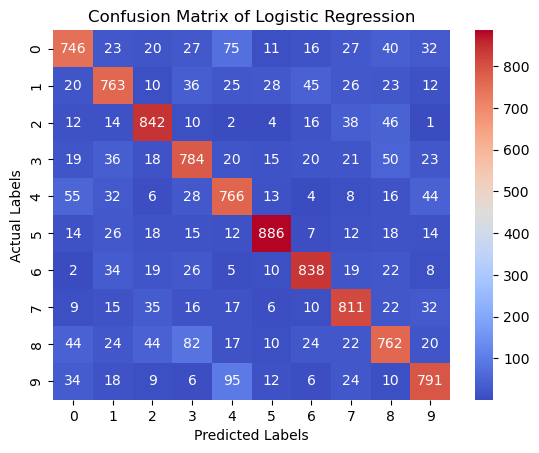

In [60]:
# Creating and visualising the Confusion Matrix
conf_matrix = confusion_matrix(log_reg_pred_tfidf,y_test_tfidf)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm")
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


# Predicting  Category for New NEWS articles.

In [62]:
def predict_news_category():
    user_headline = input("Enter News Headline: ")
    user_description = input("Enter News Description: ")
    user_keywords = input("Enter Keywords (comma-separated): ")

    # Combine all text inputs
    combined_text = user_headline + " " + user_description + " " + user_keywords
    preprocessed_text = preprocessing(combined_text)  # Clean text by using fuction we creeated earlier to clean our data (preprocessing)

    # Convert to TF-IDF features
    tfidf_user = vectorizer.transform([preprocessed_text])

    # Predict category
    predicted_label = svc.predict(tfidf_user)[0]


    print(f"\n Predicted Category: {predicted_label}")

In [63]:
# Run prediction function
predict_news_category()

Enter News Headline:  Stock Markets Rally After Positive Economic Data
Enter News Description:  Global stock markets saw a sharp rise today following the release of encouraging economic growth figures from major economies.
Enter Keywords (comma-separated):  stock market", "economy", "finance", "growth"



 Predicted Category: BUSINESS


In [111]:
# Run prediction function
predict_news_category()

Enter News Headline:  Scientists Discover New Exoplanet in Habitable Zone
Enter News Description:  Astronomers have detected a potentially habitable exoplanet orbiting a nearby star, raising hopes for future space exploration.
Enter Keywords (comma-separated):  space", "exoplanet", "astronomy", "NASA



 Predicted Category: WORLD NEWS


In [113]:
# Run prediction function
predict_news_category()

Enter News Headline:  Health Experts Warn of New Virus Outbreak
Enter News Description:  Medical authorities have issued alerts regarding the emergence of a new viral infection that is spreading rapidly in several regions.
Enter Keywords (comma-separated):  "health", "virus", "pandemic", "medical"



 Predicted Category: WELLNESS
